<h1 style='color:#0B4F6C;font-weight:bold;text-align:center;font-size:3rem;'>Customer Segmentation</h1>


<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Importing libraries</h2>
</div>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Importing data</h2>
</div>

In [62]:
data = pd.read_csv('Mall_Customers.csv')

In [63]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Shape of data</h2>
</div>

In [64]:
data.shape

(200, 5)

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>200 rows with 5 columns.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Columns of data</h2>
</div>

In [65]:
for col in data.columns:
    print(col)

CustomerID
Gender
Age
Annual Income (k$)
Spending Score (1-100)


<hr style="border-top: 2px solid #333;margin:30px 0;">

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Data Exploration</h2>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Customer ID</h2>
</div>

In [66]:
data['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>There are 200 rows in our data and the 'Customer ID' column contains 200 rows, each with a dinstict value from 1 to 200. So, this column uniquely identifies each row and doesn't adds to our analysis.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Gender</h2>
</div>

In [67]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [68]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>Female count rate is higher.</p>
</div>

In [69]:
data['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>The ratio is 56%. Females spending more money compared to men.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Age</h2>
</div>

In [70]:
data['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>A range of values. Let's dive deeper.</p>
</div>

In [71]:
data['Age'].describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>Minimum age is 18 and maximum age is 70.</p>
</div>

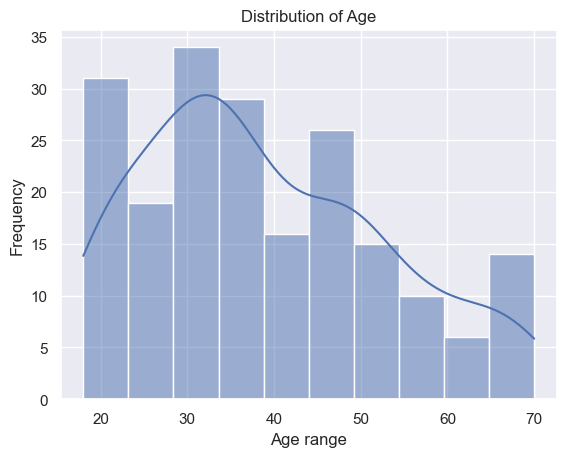

In [72]:
sns.histplot(data['Age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age range')
plt.ylabel('Frequency')
plt.show()

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>The peak age where people tend to spend more is the age between 25 to 40. As the age increase, the spending habit decreases.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Annual Income</h2>
</div>

In [73]:
data['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [74]:
data['Annual Income (k$)'].describe()

count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>Annual income is between 15 thousand dollars to 137 thousand dollars.</p>
</div>

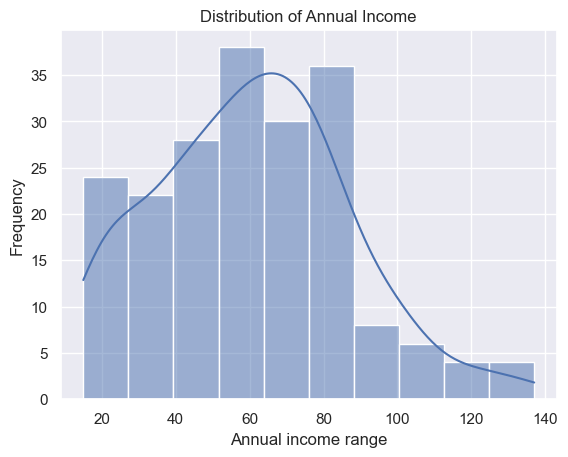

In [75]:
sns.histplot(data['Annual Income (k$)'], bins=10, kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual income range')
plt.ylabel('Frequency')
plt.show()

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>People earn between the range of 20 to 80 thousand dollars.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Spending Score</h2>
</div>

In [76]:
data['Spending Score (1-100)'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18],
      dtype=int64)

In [77]:
data['Spending Score (1-100)'].describe()

count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>The spending score tells us how much people are willing to spend. For example, a score of 1 shows the spending habit of someone who is unwilling to spend, whereas a score of 100 shows the spending habit of a generous person. A score of 50 will tell us a person who spends moderately.</p>
</div>

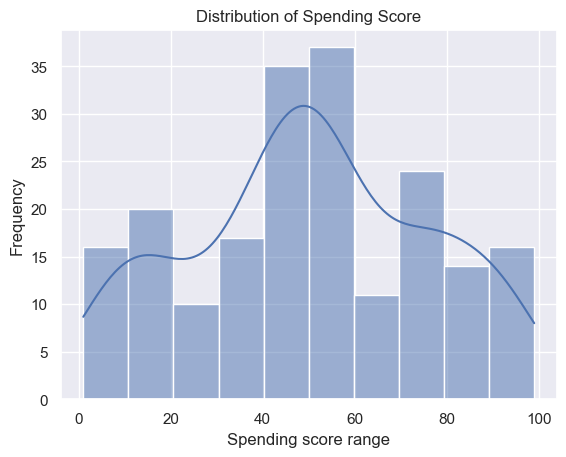

In [78]:
sns.histplot(data['Spending Score (1-100)'], bins=10, kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending score range')
plt.ylabel('Frequency')
plt.show()

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>Most people have moderate spending style.</p>
</div>

<hr style="border-top: 2px solid #333;margin:30px 0;">

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Data Cleaning</h2>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Checking for NULL values</h2>
</div>

In [79]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>No NULL values in the data.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Checking for Duplicate values</h2>
</div>

In [80]:
data.duplicated().sum()

0

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>No duplicate values in the data.</p>
</div>

<hr style="border-top: 2px solid #333;margin:30px 0;">

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Extracting the features from the data</h2>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>We will extract only the two columns from the data that we will be using for clustering.</h2>
</div>

In [81]:
x = data.iloc[:, [3, 4]].values

In [82]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>The spending score column and the annual income column is picked out.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Now we have to find out the optimal number of clusters for our data. For this, we have to record the values of inertia(sum of squared distances of samples to their closest cluster center) in a list for each number of clusters.</h2>
</div>

In [83]:
list = []

for i in range(1, 11):
    kmeans_object = KMeans(n_clusters=i, init='k-means++')
    kmeans_object.fit(x)
    list.append(kmeans_object.inertia_)

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Now we will visualize this list.</h2>
</div>

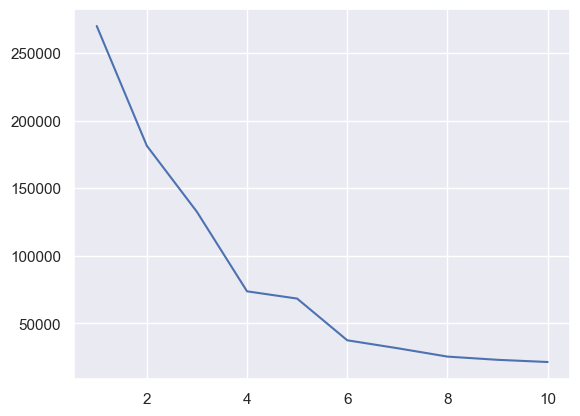

In [84]:
sns.set()
plt.plot(range(1, 11), list)
plt.show()

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>We can observe two breakpoints. These tell us that the optimal number of clusters will be either 3 or 5. We will go for 5.</p>
</div>

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Now we will train our K-Means model for 5 clusters.</h2>
</div>

In [85]:
kmeans_object = KMeans(n_clusters=5, init='k-means++')

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1rem;'>Our model will predict some labels for our input features. We will store it in our variable y.</h2>
</div>

In [86]:
y = kmeans_object.fit_predict(x)

In [87]:
y

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>These are our labels. It is a set of 200 values.</p>
</div>

<hr style="border-top: 2px solid #333;margin:30px 0;">

<div>
    <h2 style='color:#1e555c;font-weight:bold;font-size:1.5rem;padding:1rem 0;'>Visualizing our clusters</h2>
</div>

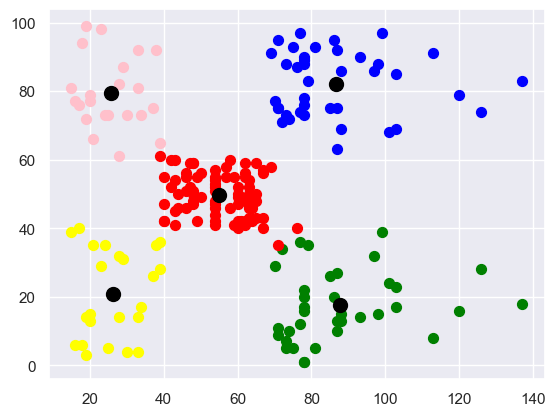

In [88]:
plt.figure()
plt.scatter(x[y==0, 0], x[y==0, 1], s=50, color='green', label='Cluster 1')
plt.scatter(x[y==1, 0], x[y==1, 1], s=50, color='red', label='Cluster 2')
plt.scatter(x[y==2, 0], x[y==2, 1], s=50, color='blue', label='Cluster 3')
plt.scatter(x[y==3, 0], x[y==3, 1], s=50, color='yellow', label='Cluster 4')
plt.scatter(x[y==4, 0], x[y==4, 1], s=50, color='pink', label='Cluster 5')

plt.scatter(kmeans_object.cluster_centers_[:,0], kmeans_object.cluster_centers_[:,1], s=100, color='black', label='Centroid')

plt.show()

<div style='background-color:#595758;padding:1rem;margin:3rem 0;border-radius:0.5rem;'>
    <p style='color:#FFEEF2;font-weight:400;font-size:1.3rem;display:inline;'>These are our visualized 5 clusters, visualized through 5 different colors, with the black dots representing the Centroids. These centroids or center points show the middle row or the axis along which the other points of the data of the similar cluster are closest according to Euclidean distance.</p>
</div>

<hr style="border-top: 2px solid #333;margin:30px 0;">